In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
#importing data as pandas dataframe
data_df = pd.read_csv("diabetes.csv")
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data_df.shape

(768, 9)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data_df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
#this is an imbalance data set so lets balance the data set
data_1 = data_df[data_df.Outcome == 1]
data_0 = data_df[data_df.Outcome == 0]

In [9]:
data_0 = data_0.sample(n=268)

In [10]:
data_df = pd.concat([data_0,data_1],axis=0)

In [11]:
data_df.shape

(536, 9)

In [12]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
212,7,179,95,31,0,34.2,0.164,60,0
680,2,56,56,28,45,24.2,0.332,22,0
385,1,119,54,13,50,22.3,0.205,24,0
7,10,115,0,0,0,35.3,0.134,29,0
447,0,95,80,45,92,36.5,0.330,26,0


In [13]:
data_df.Outcome.value_counts()

0    268
1    268
Name: Outcome, dtype: int64

In [14]:
data_df['Pregnancies'].value_counts()

1     90
0     78
2     58
3     52
4     44
5     39
6     38
7     35
8     30
9     23
10    22
11     9
13     8
12     6
14     2
15     1
17     1
Name: Pregnancies, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

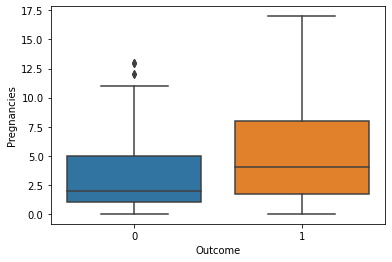

In [15]:
sns.boxplot(x='Outcome',y='Pregnancies',data=data_df)

<AxesSubplot:>

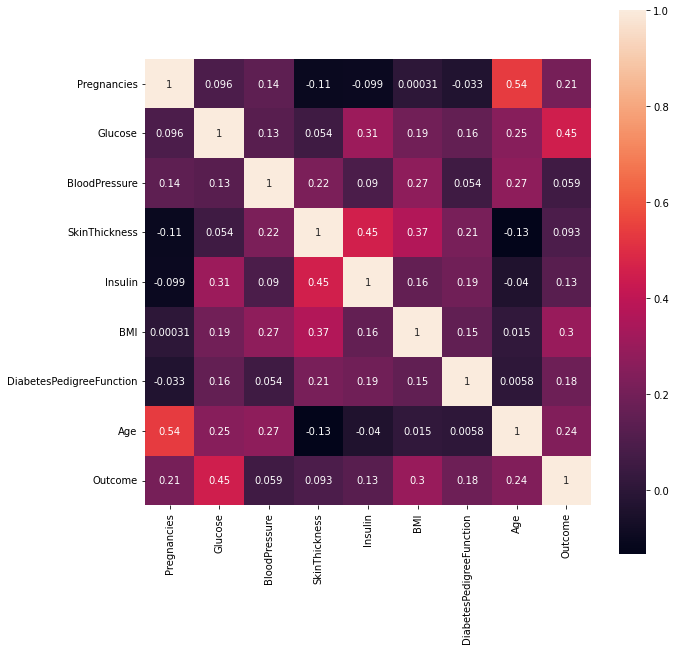

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data_df.corr(),cbar=True,square=True,annot=True)

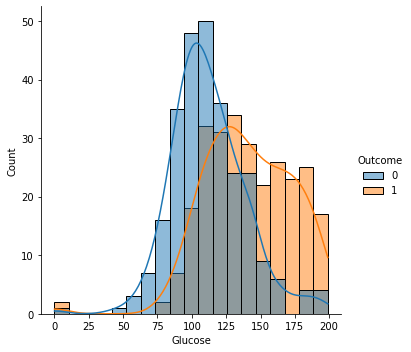

In [17]:
sns.displot(data=data_df,x='Glucose',kde=True,hue='Outcome')

the glucose level is higher for the person who have diabetes compare to the person who dont have diabetes

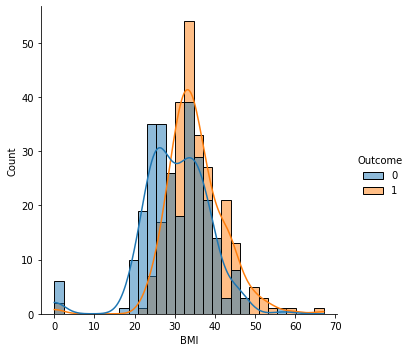

In [18]:
sns.displot(data=data_df,x='BMI',kde=True,hue='Outcome')

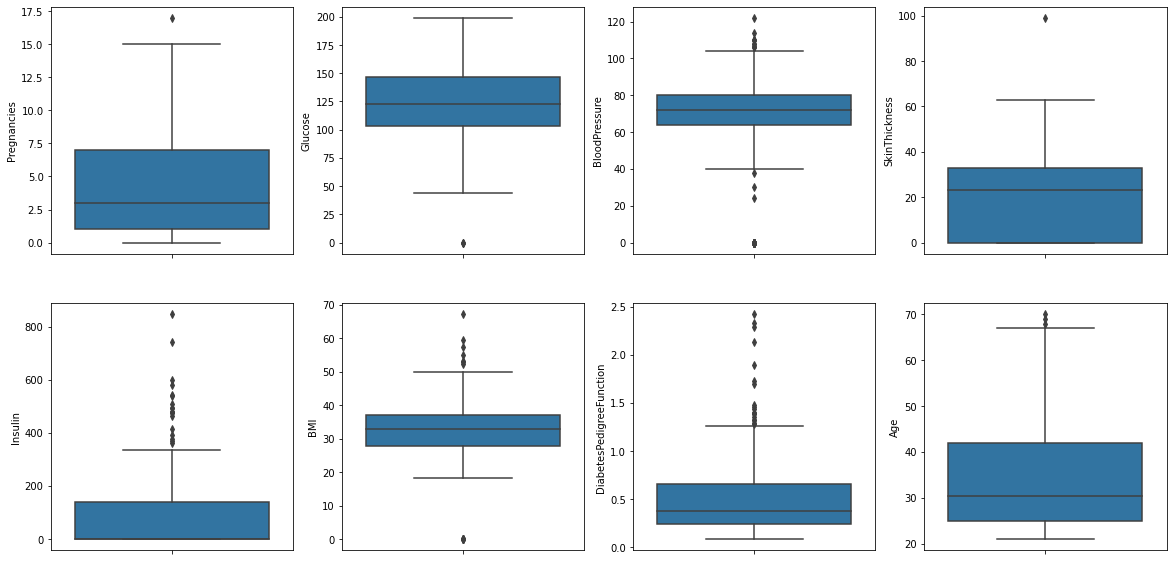

In [19]:
fig,axs = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()
for colm in data_df.columns[:8]:
    sns.boxplot(y=colm,data=data_df,ax=axs[index])
    index += 1

their are some outliers but out dataset is not big so not droping the outlier

In [20]:
x = data_df.drop(columns="Outcome",axis=1)
y = np.array(data_df["Outcome"])

In [21]:
#x = scale.transform(x)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
model = svm.SVC(kernel="linear",C=3)
model.fit(x_test,y_test)

SVC(C=3, kernel='linear')

In [25]:
x_test_predict = model.predict(x_test)
acc = accuracy_score(x_test_predict,y_test)
print(acc)
print(x_test_predict)

0.8703703703703703
[0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1
 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1]


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,x_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.89      0.86      0.88        29

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



In [28]:
print(confusion_matrix(y_test,x_test_predict))

[[22  3]
 [ 4 25]]


In [29]:
input_data = (6,148,72,35,0,33.6,0.627,50)
input_data_np = np.asarray(input_data)
input_data_np_reshape = input_data_np.reshape(1,-1) 
input_data = scaler.transform(input_data_np_reshape)
predict = model.predict(input_data_np_reshape)
print(predict)
if predict[0] == 1:
    print('d')
else:
    print('no d')

[1]
d


C:\Users\CLICK\miniconda3\envs\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
